In [1]:
import SNN_front_end
import importlib
importlib.reload(SNN_front_end)
from SNN_front_end import *


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [2]:
from sklearn.decomposition import PCA
#for interactive plotting outside notebook
%matplotlib qt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### PCA

In [4]:
'''
Input Data
'''
no_electrodes = 12
sample = emg_data[:no_electrodes+1,:200]

#el1 = sample[0,:]
#el2 = sample[1,:]
#el3 = sample[2,:]
#X = np.c_[el1, el2, el3]
time = np.linspace(0,len(sample[0])/sampling_rate,len(sample[0]))

X = np.stack(sample, axis=-1)

pca = PCA() #n_components=
pca.fit(X)
#principal axes
PA = pca.components_.T*100
#variance explained by each pc
var = pca.explained_variance_ratio_

#finding the no. of PCs necessary to explain given ratio of variance
no_pc = 0
sum = 0
while sum<0.9975:
    sum += var[no_pc]
    no_pc += 1
print('Principal Axes:')
print(PA[:3])
print('No. of PCs explaining 99.75% of variance: ', no_pc)

Principal Axes:
[[-3.38531629e+01 -3.23283154e+01 -2.70356081e+01 -1.08498432e+01
   7.55025219e+01 -3.24412038e+01  4.26787494e+00 -1.84197632e-01
  -7.39129268e+00 -1.15562434e+01  4.27134300e-01  7.27024606e-01]
 [-4.77515741e+01 -4.43365284e+01 -4.62449777e+01 -1.97900157e+01
  -5.37996422e+01  1.32434767e+01 -1.21873865e-02  4.19725807e+00
   1.03494815e+01 -4.80026863e+00  8.37208515e-01 -2.35651557e+00]
 [-8.25269714e+00 -5.00932293e+00 -5.95405174e+00 -3.37140430e+00
   5.24855892e+00  1.80534656e+01  5.18011947e+00 -1.94829352e+01
  -4.70488241e+01  7.32790553e+01  3.73826881e+01  1.09184260e+01]]
No. of PCs explaining 99.75% of variance:  10


#### Plotting 3D sample of data

In [6]:
#Only conducting PCA on 3 displayable dimensions for visualisation purposes
X_d = np.stack(sample[:3], axis=-1)
pca_d = PCA()
pca_d.fit(X_d)
#principal axes
PA_d = pca_d.components_.T*100

fig = plt.figure(figsize=(10,7))
plt.plot(time, np.swapaxes(sample,1,0), color='#52AD89')
#color='#75BDA1'
#color='#7CCEAE'
plt.title('EMG Channels')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (\u03BCV)')
plt.show()
fig = plt.figure(figsize=(10, 7))
elev = 30
azim = 60
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elev, azim=azim)
ax.scatter(sample[0,:],sample[1,:],sample[2,:], marker="+", color='#52AD89', alpha=0.8)
ax.set_xlabel('Electrode 0 (\u03BCV)')
ax.set_ylabel('Electrode 1 (\u03BCV)')
ax.set_zlabel('Electrode 2 (\u03BCV)')
ax.set_title('EMG Channels Feature Space')
soa = np.array([[0,0,0,PA_d[0][0],PA_d[0][1],PA_d[0][2]],[0,0,0,PA_d[1][0],PA_d[1][1],PA_d[1][2]],[0,0,0,PA_d[2][0],PA_d[2][1],PA_d[2][2]]])
Xs, Y, Z, U, V, W = zip(*soa)
ax.quiver(Xs, Y, Z, U, V, W, color='#AD5276', label='Principal Directions')
ax.legend()


if False:
    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_23440\3776910505.py:19: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elev, azim=azim)


#### Transforming data to Principal Components

In [7]:
X_new = pca.transform(X)
pc = [[X_new[t][p] for t in range(len(X_new))] for p in range(no_electrodes)]

#ORIGINAL CHANNELS AND 3 PRINCIPAL COMPONENTS
fig = plt.figure(figsize=(10,7))
plt.plot(time, np.swapaxes(sample[1:],1,0), color='#52AD89')
plt.plot(time, sample[0], color='#52AD89', label='channels')
plt.plot(time, pc[0], color='#AD5276', label='first 3 principal components')
plt.plot(time, pc[1], color='#AD5276')
plt.plot(time, pc[2], color='#AD5276')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (\u03BCV)')
plt.title('PCA decomposition')
plt.show()

#### Correlation Matrix

In [8]:
from scipy.stats import pearsonr

correlations = np.zeros((no_electrodes, no_electrodes))
for e in range(no_electrodes):
    correlations[e,:] = np.array([pearsonr(sample[e,:],pc[p])[0] for p in range(no_electrodes)])


#CORRELATION MATRIX
fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(correlations, cmap='gray')
ax.set_xlabel('Principal Components')
ax.xaxis.set_label_position('top')
ax.set_ylabel('Channels')
ax.set_xticks([t for t in range(no_electrodes)])
ax.xaxis.tick_top()
ax.set_yticks([t for t in range(no_electrodes)])
fig.colorbar(im, label='Pearson coeff.')
im.set_clim(-1, 1)
ax.set_title('Correlation Matrix')
fig.tight_layout()
plt.show()

#SORTED CORRELATION MATRIX
sorted = np.sort(correlations, axis=0)[::-1]
fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(sorted, cmap='gray')
ax.set_xlabel('Principal Components')
ax.xaxis.set_label_position('top')
ax.set_ylabel('Correlation Rank (Channels)')
ax.set_xticks([t for t in range(no_electrodes)])
ax.xaxis.tick_top()
ax.set_yticks([t for t in range(no_electrodes)])
ax.set_yticklabels([t+1 for t in range(no_electrodes)])
fig.colorbar(im, label='Pearson coeff.')
im.set_clim(-1, 1)
ax.set_title('Sorted Correlation Matrix')
fig.tight_layout()
plt.show()


#### Finding most influential ('principal') electrodes

In [ ]:
idx = (-correlations[:,:no_pc]).argsort(axis=0)[:2] #get indices of 2 highest coefficients (first row gives indeces of elec. that is most correlated with each PC. second row gives indeces of second most correlated electrodes)
idx.flatten() #covnert to 1D array since irrespective if most or 2nd to most correlated
idx.sort()
pc_electrodes = np.unique(idx) #remove repeating electrode indeces

print('Most influential electrodes:')
print(pc_electrodes)


### PCA when including time as a feature
I though that electrodes are uncorellated features that are only connected by the time dimensions. Therefore, I included it as another feature. For each time instance, one electrode had a value while all others where set to zero: this doesn't make much sense.
The only variation then occurs over time and principal axis are practically along the time dimension.
Basically I tried to capture the temporal directionality of the data but for PCA the data has to be taken as stationary with each time instance taken as a data point (i.e., sample) without an order.

In [21]:
sample = emg_data[:,:100]
el1 = sample[0,:]
el2 = sample[1,:]
time = np.linspace(0,len(el1)/sampling_rate,len(el1))

zero = np.zeros(len(el1))
Y = np.c_[time, el1, zero]
X = np.c_[time, zero, el2]
Y = np.append(Y, X, axis=0)

pca = PCA(n_components=3)
pca.fit(Y)
#principal axes
V = pca.components_.T*10
var = pca.explained_variance_



In [20]:
#plt.plot(time, el1)
#plt.plot(time, el2)
#plt.show()
fig = plt.figure(figsize=(10, 7))
elev = 30
azim = 60
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elev, azim=azim)
ax.scatter(time, el1, np.zeros(len(el1)), marker="+", alpha=0.8)
ax.scatter(time, np.zeros(len(el2)), el2, marker="+", alpha=0.8)
soa = np.array([0,0,0,V[0][0],V[0][1],V[0][2]])
X, Y, Z, U, V, W = zip(soa)
ax.quiver(X, Y, Z, U, V, W)
#ax.quiver(0,0,0,V[0][0],V[0][1],V[0][2])
#ax.quiver(0,0,0,V[1][0],V[1][1],V[1][2])

if False:
    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_16656\1555740676.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elev, azim=azim)


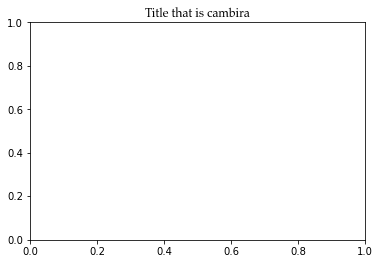

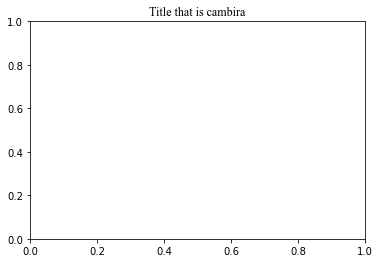

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Title that is cambira', fontname="Palatino", fontsize=12)
plt.show()

#import matplotlib.font_manager
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')